# Concise Notes on Image Recognition, Fastai 2019 v3 Lesson 1 

These are concise notes from the Image recognition content covered in 2019 Fastai DL Lesson 1 with some of my interpretations and additions. I hope you find it helpful. 

Original Lesson 1 notes can be found at https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson1-pets.ipynb

By the end of this tutorial, you will be able to build and train an Image Recognizer on your own image dataset.

The aim is to make these notes concise and easily understood by anybody with basic programming skills, without necessarily having watched the Fastai Lesson. 

These notes cover:
    1. Setting up IPython Kernel and Initialization
    2. Data Extraction
    3. Data Visualization
    4. Model Training
    5. Results interpretation
    6. Freezing and Unfreezing
    7. Fine-Tuning    

This notebook can be run AS IS with reproducible results, as of today's date 4/14/2019. 

To simply run this notebook, you can download it [here](https://drive.google.com/open?id=1MNpxqMGvg2IanZfmLmtpUFqjUUGb3Wuv) and upload it to your Google [Colab](https://colab.research.google.com/notebooks/welcome.ipynb#recent=true). <br>Once uploaded to Colab, **make sure to change the following to enable GPU backend,** <br>
> Runtime -> Change runtime type -> Hardware Accelerator -> GPU

### Let's start...

## 1. Setting up IPython Kernel and Initialization

Importing necessary libraries and progress bar

In [33]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#Fastai library
from fastai.vision import *
from fastai.metrics import error_rate

In [34]:
bs = 64

**Batch size** is the number of training images to be fed to the model at once. 

The model parameters are updated after each batch iteration. For instance, if you have 640 images and your batch size is 64; the parameters will be updated 10 times over the course of 1 epoch.

Usually, a larger batch size is recommended. However, if out of memory, a smaller batch size can be used.

Batch size is usually multiple of 2s.

In [35]:
np.random.seed(2)

Initialiazing the pseudo-random number generator with a specific value makes the system stable, creating reproducible results.

## 2. Data Extraction

In [36]:
path = untar_data(URLs.PETS) 

**URLs.PETS** is the url of the Pets dataset used for this lesson. It features 12 cat breeds and 25 dogs breeds.

**untar_data** decompresses and downloads the data file.

In [37]:
path #The path where data is downloaded.

PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet')

In [38]:
path.ls() #List of items contained within the path, two subdirectories in this case. 

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations')]

In [39]:
#Put the PATH of each of the subdirectories into some instance
path_anno = path/'annotations'
path_img = path/'images'

In [40]:
fnames = get_image_files(path_img)

**get_image_files** gets the _paths_ of ALL files contained in _images_ directory and stores them into a list *fnames*.

In [41]:
fnames[1] #An instance from the list fnames, which contains the path of an image

PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Bengal_82.jpg')

In [42]:
pat = r'/([^/]+)_\d+.jpg$'

**pat** represents the pattern to be used to extract the *label* from the image file name.

In [43]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

**ImageDataBunch** is a class that creates a training dataset, *train_ds*, and a validation dataset, *valid_ds*, from the images in the path *path_img*.

**from_name_re** gets the labels from the list of file names, *fnames*, using a regular expression. The regular expression is obtained after compiling the expression pattern *pat*.

**df_tfms** are transformations to be applied to images on the fly. Here, images will be resized to 224x224, centered, cropped and zoomed. Such transformations are instances of *Data Augmentation*, which has proved to be pormising in computer vision problems. Such transformations do not change what's inside the image but change its pixel values for a better model generalization.

**normalize** normalizes the data using the standard deviation and mean of ImageNet images.

## 3. Data Visualization

A training data sample is represented as,

In [44]:
img = data.train_ds[1]

The first element represent the image 3 RGB channels, rows, and columns, respectively.  
The second element is the image label.

The corresponding image is:

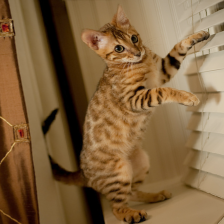

In [45]:
data.train_ds[1][0]

In [46]:
print (len(data.train_ds)) #Total Training Images
print (len(data.valid_ds)) #Total Validation Images

5912
1478


In [47]:
data.c #Total number of classes in our dataset

37

In [48]:
data.classes #Classes labels

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

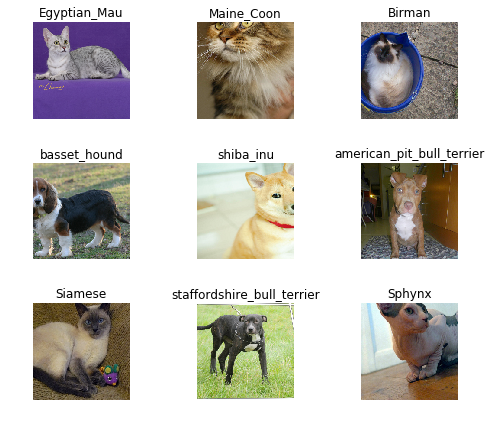

In [49]:
data.show_batch(rows=3, figsize=(7,6))

**show_batch** shows few images inside a batch.

## 4. Model Training

In [50]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

**cnn_learner** builds a convulotional neural network (CNN) learner using a pretrained model from a given architecture, i.e resnet34. The learned parameters from the pretrained model are used to initialize our model, allowing a faster convergence with a high accuracy. 

In [51]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.393280,0.376812,0.124493,00:32
1,0.548056,0.263004,0.083897,00:32
2,0.345613,0.239157,0.082544,00:31
3,0.257214,0.233552,0.069012,00:31


**fit_one_cycle** trains the model on the given dataset for the number of epochs specified, i.e 4. 

The epochs number represents the number of times the model looks at the entire set of images. In every epoch the same image is slightly different following our data augmentation. 

Usually, the metric error will go down with each epoch. It is a good idea to increase the number of epochs as long as the accuracy of the validation set keeps improving. However, many epochs will result in learning the specific image and not the general class, something we want to avoid.

**Congratulations, we have just learned to successfully recognize dog and cat breeds.**

The accuracy achieved is (1 - error_rate) * 100.

*Let's now see how to properly interpret the results and if we can further improve the model.*

In [52]:
learn.save('stage-1')

**save** saves the model current parameters in case we may need to reload it later.

## 5. Results interpretation

In [53]:
interp = ClassificationInterpretation.from_learner(learn)

**ClassificationInterpretation** provides a visualization of the misclassfied images.

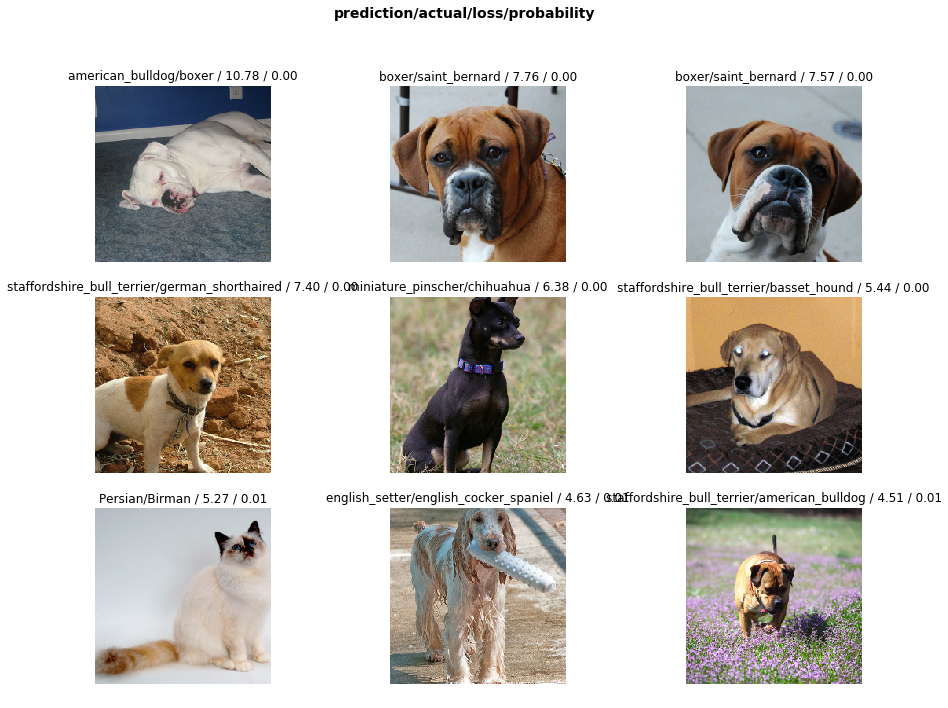

In [54]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

**plot_top_losses** shows images with top losses along with their: <br>prediction label / actual label / loss / probability of actual image class.

A high loss implies high confidence about the wrong answer. Plotting top losses is great way to visualize and interpret classification results. 

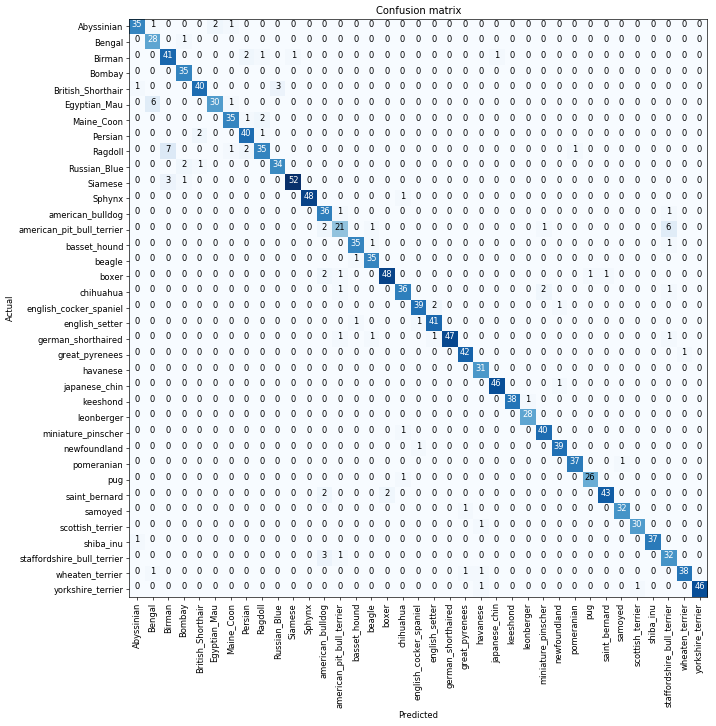

In [55]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In a **confusion matrix**, the diagonal elements represent the number of images for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier.

In [24]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 10),
 ('Siamese', 'Birman', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('staffordshire_bull_terrier', 'american_bulldog', 5),
 ('boxer', 'american_bulldog', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Egyptian_Mau', 'Abyssinian', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Bengal', 'Maine_Coon', 2),
 ('Birman', 'Ragdoll', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Persian', 'British_Shorthair', 2),
 ('Persian', 'Ragdoll', 2),
 ('Ragdoll', 'Persian', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('beagle', 'basset_hound', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('saint_bernard', 'american_bulldog', 2),
 ('saint_bernard', 'boxer', 2),
 ('wheaten_terrier', 'havanese', 2)]

**most_confused** simply grabs out of the confusion matrix the most confused combinations of predicted and actual categories; in other words, the ones that it got wrong most often. 

## 6. Freezing and Unfreezing

By default, using a pre-trained model **freezes** the first layers. The network can then only make changes to the weights of last added layers. The reasoning behind this is that the first layers are already well trained in detecting low level features, such as diagonal lines, edges, and color gradients changes. It is very unlikely that the definitions of these lower features to be different in our dog & cat dataset versus ImageNet, which we originally trained on. On the other hand, the higher layers focus on more complex patterns, which are more specific to the current dataset. By freezing the first layers and training only the deeper layers, we can significantly reduce a lot of the computation.

If interested in a visualization of the evolution of detected features throughout the layers, check out this classic paper, [Visualizing and Understanding Convolutional Networks](https://arxiv.org/pdf/1311.2901.pdf).

We can always train all layers of the network by calling **unfreeze** function, followed by **fit** or **fit_one_cycle**.

In [71]:
learn.unfreeze()
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.609774,0.689159,0.196211,00:41
1,0.363754,0.299855,0.100135,00:42


*The accuracy now is a little worse than before.*

*Why?*

Training all layers at the same speed tries to update the parameters of the lower layers as much as of the higher layers, which is not what we desire since the first layers do not need much change. 

The changes made to the layers' parameters (weights) are controlled by the **learning rate**. This hyper-parameter is a key parameter for adequate model training, it adjusts the weights of the network with respect to the gradient of the loss.

Therefore, a clever approach to update the parameters of the different layers is to use different learning rates for the lower and higher layers. 

The process of tuning the parameters is often called **fine-tuning**.

## 7. Fine-Tuning

Let's load the model we had previously saved.

In [74]:
learn.load('stage-1');

Previously, we did not specify the learning rate so the default was used, which is set to 0.003.

In order to find the most appropriate learning rate, we run **lr_find**. This function uses Cyclical Learning Rates, where the learning rate is increased from a very small value until the loss stops decreasing. 

In [58]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


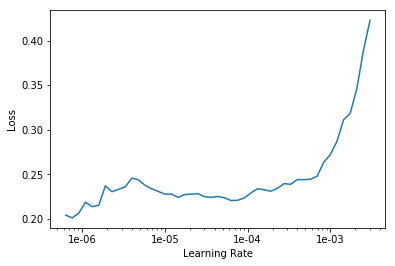

In [59]:
learn.recorder.plot()

From the plot, we find that the ideal learning rate is around 1e-4 or lower, as the Loss starts to significantly increase following that.  

Therefore, we choose 1e-4 as a learning rate for the last layers and a much smaller rate of 1e-6 for the intial layers.

In general, higher learning rate makes sure that the machine ends up learning faster, but too high of a learning rate can fail to converge. Small learning rates take more time to reach the accurate result. Thus, picking an adequate learning rate is crucial for model training. More about learning rate can be found in this post, [Setting the learning rate of your neural network](https://www.jeremyjordan.me/nn-learning-rate/).

### Moment of Truth

Now that we picked the learning rates for our layers, we can unfreeze the model and train accordingly.

In [77]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.180836,0.211243,0.067659,00:41
1,0.167472,0.205837,0.067659,00:41


The accuracy has improved and it is better than all previous attempts.

### Congratulations, we have now successfully built an Image Recognizer for the Pets Breeds dataset.

### You are now ready to build an image recognizer on your own dataset. Once done, test it on a new image it has never seen before and see how it does.

### If you do not already have a dataset, you can easily scapre images of google and make one. This other short step-by-step tutorial is just for that.


Acknowledgment: **Thanks to Jeremry Howard and Rachel Thomas for their efforts creating all the beautiful fastai content.** Check it out at https://www.fast.ai/